<a href="https://colab.research.google.com/github/Ignaciojeda/EDA_FundamentosML_IgnacioOjeda/blob/main/PruebaMejorada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos (EDA) - Ventas Minoristas
# **Introducción**
Este notebook contiene un análisis exploratorio de datos del dataset de ventas minoristas que incluye información sobre transacciones de productos. El objetivo es analizar patrones de compra, productos más vendidos, comportamiento de clientes y distribución geográfica de las ventas.

# Configuración inicial y carga de datos

In [17]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_1samp

# Configuración para visualizaciones
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


# 2. Cargar el dataset
Luego de haber importado las librerias necesarias para realizar nuestro analisis debemos cargar el dataset, se puede hacer de varias maneras en este caso sincronizaremos nuestro google colab con drive para asi no haya necesidad de descargar siempre el dataset cuando necesitemos acceder a esta investigacion

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
url = '/content/drive/MyDrive/Machine/data.csv'
df = pd.read_csv(url, sep=",", encoding='latin-1')
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# 1. Exploración inicial y tipos de datos



In [5]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Descripción estadística básica
print("\nEstadísticas descriptivas básicas:")
print(df.describe())

# Verificar valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())

# Mostrar las primeras filas del dataset
print("\nPrimeras 5 filas del dataset:")
print(df.head())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Estadísticas descriptivas básicas:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000 

# 1.1 Identificación y clasificación de variables

In [6]:
# Clasificación de variables
print("\n--- Clasificación de variables ---")

# Variables numéricas
numericas_continuas = ['Quantity', 'UnitPrice']
numericas_discretas = ['CustomerID', 'InvoiceNo']

# Variables categóricas
categoricas_nominales = ['StockCode', 'Description', 'Country']
categoricas_ordinales = ['InvoiceDate']  # Podría convertirse a datetime y extraer características

print("Variables numéricas continuas:", numericas_continuas)
print("Variables numéricas discretas:", numericas_discretas)
print("Variables categóricas nominales:", categoricas_nominales)
print("Variables categóricas ordinales:", categoricas_ordinales)

# Convertir InvoiceDate a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


--- Clasificación de variables ---
Variables numéricas continuas: ['Quantity', 'UnitPrice']
Variables numéricas discretas: ['CustomerID', 'InvoiceNo']
Variables categóricas nominales: ['StockCode', 'Description', 'Country']
Variables categóricas ordinales: ['InvoiceDate']


# 2. Análisis estadístico descriptivo

# 2.1 Medidas de tendencia central y dispersión para variables numéricas

In [21]:
# Estadísticas descriptivas para variables numéricas
print("\n--- Estadísticas descriptivas para variables numéricas ---")
stats_df = df[numericas_continuas].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
stats_df = stats_df.T
stats_df['cv'] = stats_df['std'] / stats_df['mean']  # Coeficiente de variación
stats_df['skew'] = df[numericas_continuas].skew()  # Asimetría
stats_df['kurt'] = df[numericas_continuas].kurtosis()  # Curtosis
print(stats_df.round(2))

# Análisis de distribución
print("\n--- Análisis de distribución y sesgo ---")
for col in numericas_continuas:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col}:")
    print(f"  Asimetría (Skewness): {skew:.2f} - ", end="")
    if skew > 0.5:
        print("Sesgo positivo significativo (cola a la derecha)")
    elif skew < -0.5:
        print("Sesgo negativo significativo (cola a la izquierda)")
    else:
        print("Distribución aproximadamente simétrica")
    print(f"  Curtosis: {kurt:.2f} - ", end="")
    if kurt > 0.5:
        print("Leptocúrtica (más apuntada que la normal)")
    elif kurt < -0.5:
        print("Platicúrtica (más aplanada que la normal)")
    else:
        print("Mesocúrtica (similar a la normal)")
    print()
    print("\nComparación Media vs. Mediana:")
print("- Quantity: Media={:.2f} vs Mediana={} | Diferencia: {:.2f} ({:.2f}%)".format(
    df['Quantity'].mean(),
    df['Quantity'].median(),
    df['Quantity'].mean()-df['Quantity'].median(),
    (df['Quantity'].mean()-df['Quantity'].median())/df['Quantity'].median()*100))

print("- UnitPrice: Media={:.2f} vs Mediana={} | Diferencia: {:.2f} ({:.2f}%)".format(
    df['UnitPrice'].mean(),
    df['UnitPrice'].median(),
    df['UnitPrice'].mean()-df['UnitPrice'].median(),
    (df['UnitPrice'].mean()-df['UnitPrice'].median())/df['UnitPrice'].median()*100))

print("\nInterpretación:")
print("La gran diferencia entre media y mediana en UnitPrice ({}%) indica".format(
    round((df['UnitPrice'].mean()-df['UnitPrice'].median())/df['UnitPrice'].median()*100,2)))
print("una distribución altamente asimétrica con outliers que afectan la media.")


--- Estadísticas descriptivas para variables numéricas ---
              count  mean     std       min    1%    5%   25%   50%    75%  \
Quantity   541909.0  9.55  218.08 -80995.00 -2.00  1.00  1.00  3.00  10.00   
UnitPrice  541909.0  4.61   96.76 -11062.06  0.19  0.42  1.25  2.08   4.13   

             95%    99%      max     cv    skew       kurt  
Quantity   29.00  100.0  80995.0  22.83   -0.26  119769.16  
UnitPrice   9.95   18.0  38970.0  20.98  186.51   59005.72  

--- Análisis de distribución y sesgo ---
Quantity:
  Asimetría (Skewness): -0.26 - Distribución aproximadamente simétrica
  Curtosis: 119769.16 - Leptocúrtica (más apuntada que la normal)


Comparación Media vs. Mediana:
UnitPrice:
  Asimetría (Skewness): 186.51 - Sesgo positivo significativo (cola a la derecha)
  Curtosis: 59005.72 - Leptocúrtica (más apuntada que la normal)


Comparación Media vs. Mediana:
- Quantity: Media=9.55 vs Mediana=3.0 | Diferencia: 6.55 (218.41%)
- UnitPrice: Media=4.61 vs Mediana=2.08 | 

# 2.2 Análisis de variables categóricas

In [8]:
# Análisis de variables categóricas
print("\n--- Análisis de variables categóricas ---")

# Frecuencias para Country
print("\nDistribución por país:")
print(df['Country'].value_counts(normalize=True).round(4) * 100)

# Productos más vendidos
print("\nTop 10 productos más vendidos:")
top_products = df['Description'].value_counts().head(10)
print(top_products)


--- Análisis de variables categóricas ---

Distribución por país:
Country
United Kingdom          91.43
Germany                  1.75
France                   1.58
EIRE                     1.51
Spain                    0.47
Netherlands              0.44
Belgium                  0.38
Switzerland              0.37
Portugal                 0.28
Australia                0.23
Norway                   0.20
Italy                    0.15
Channel Islands          0.14
Finland                  0.13
Cyprus                   0.11
Sweden                   0.09
Unspecified              0.08
Austria                  0.07
Denmark                  0.07
Japan                    0.07
Poland                   0.06
Israel                   0.05
USA                      0.05
Hong Kong                0.05
Singapore                0.04
Iceland                  0.03
Canada                   0.03
Greece                   0.03
Malta                    0.02
United Arab Emirates     0.01
European Community       

# 2.3 Probabilidades y Eventos Condicionales

In [15]:
print("\n--- Probabilidades y Eventos Condicionales ---")

# Probabilidad marginal
p_uk = len(df[df['Country']=='United Kingdom'])/len(df)
print(f"P(UK): {p_uk:.2%}")

# Probabilidad condicional
p_high_value_given_uk = len(df[(df['Country']=='United Kingdom') & (df['TotalValue']>100)])/len(df[df['Country']=='United Kingdom'])
print(f"P(TotalValue>100|UK): {p_high_value_given_uk:.2%}")

# Tabla de contingencia
contingency_table = pd.crosstab(df['Country'].apply(lambda x: 'UK' if x=='United Kingdom' else 'Other'),
                                df['Quantity'].apply(lambda x: '>10' if x>10 else '<=10'))
print("\nTabla de contingencia:")
print(contingency_table)


--- Probabilidades y Eventos Condicionales ---
P(UK): 91.43%
P(TotalValue>100|UK): 2.09%

Tabla de contingencia:
Quantity    <=10     >10
Country                 
Other      23670   22761
UK        385608  109870


# 3. Visualizaciones para el análisis

# 3.0 Estadistica inferencial


In [19]:
# Filtrar datos válidos (sin outliers extremos)
data = df[(df['Quantity'] > 0) & (df['Quantity'] < 100)]['Quantity']

# Prueba t de una muestra
t_stat, p_val = ttest_1samp(data, popmean=8)
print(f"\nPrueba de hipótesis para Quantity > 8:")
print(f"  t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
print("  Conclusión:", "Rechazamos H0 (media > 8)" if p_val/2 < 0.05 and t_stat > 0 else "No hay evidencia para rechazar H0")

# Intervalos de confianza
import scipy.stats as st
ci = st.norm.interval(confidence=0.95, loc=data.mean(), scale=st.sem(data))
print(f"\nIntervalo de confianza 95% para Quantity: ({ci[0]:.2f}, {ci[1]:.2f})")


Prueba de hipótesis para Quantity > 8:
  t-statistic: -23.8892, p-value: 0.0000
  Conclusión: No hay evidencia para rechazar H0

Intervalo de confianza 95% para Quantity: (7.59, 7.66)


# 3.1 Distribuciones de variables numéricas clave

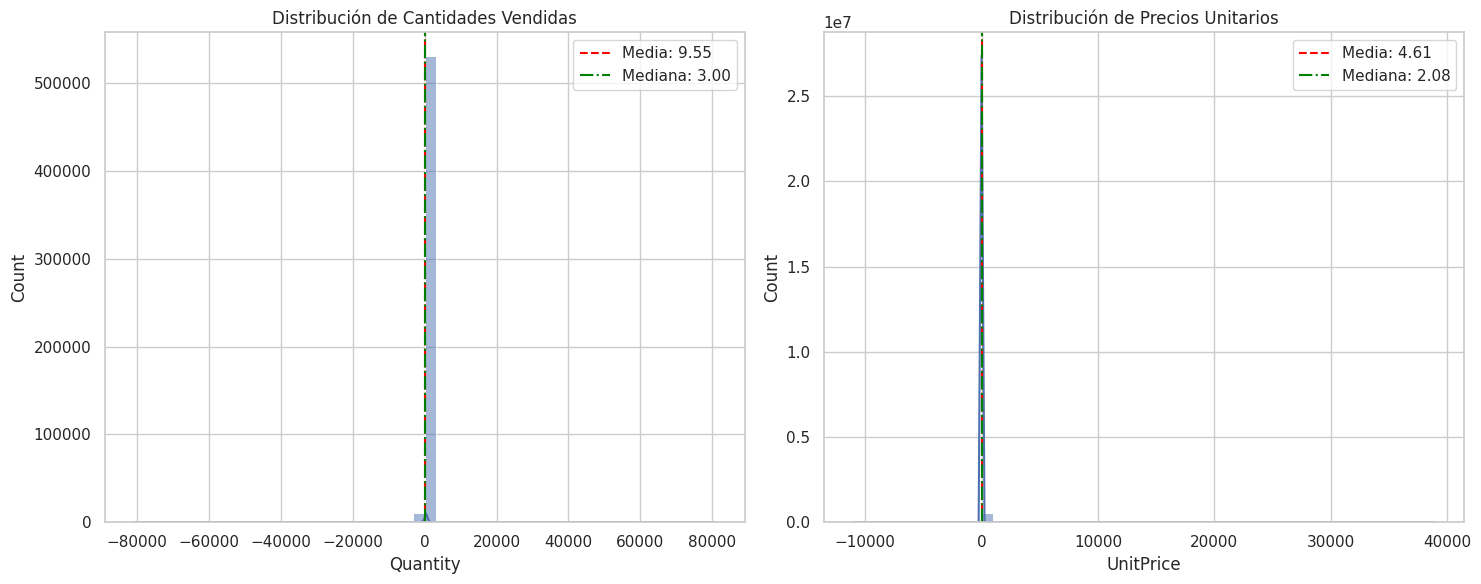

In [9]:
# Configuración para visualizaciones
plt.figure(figsize=(15, 6))

# Distribución de Quantity
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribución de Cantidades Vendidas')
plt.axvline(df['Quantity'].mean(), color='red', linestyle='--', label=f'Media: {df["Quantity"].mean():.2f}')
plt.axvline(df['Quantity'].median(), color='green', linestyle='-.', label=f'Mediana: {df["Quantity"].median():.2f}')
plt.legend()

# Distribución de UnitPrice
plt.subplot(1, 2, 2)
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribución de Precios Unitarios')
plt.axvline(df['UnitPrice'].mean(), color='red', linestyle='--', label=f'Media: {df["UnitPrice"].mean():.2f}')
plt.axvline(df['UnitPrice'].median(), color='green', linestyle='-.', label=f'Mediana: {df["UnitPrice"].median():.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# 3.2 Análisis por país

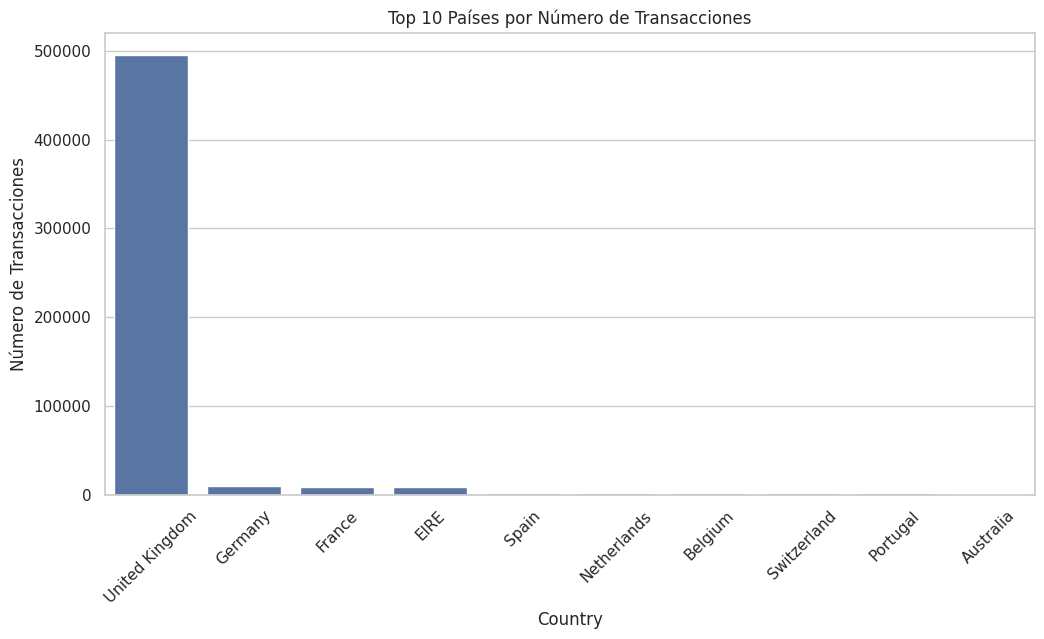

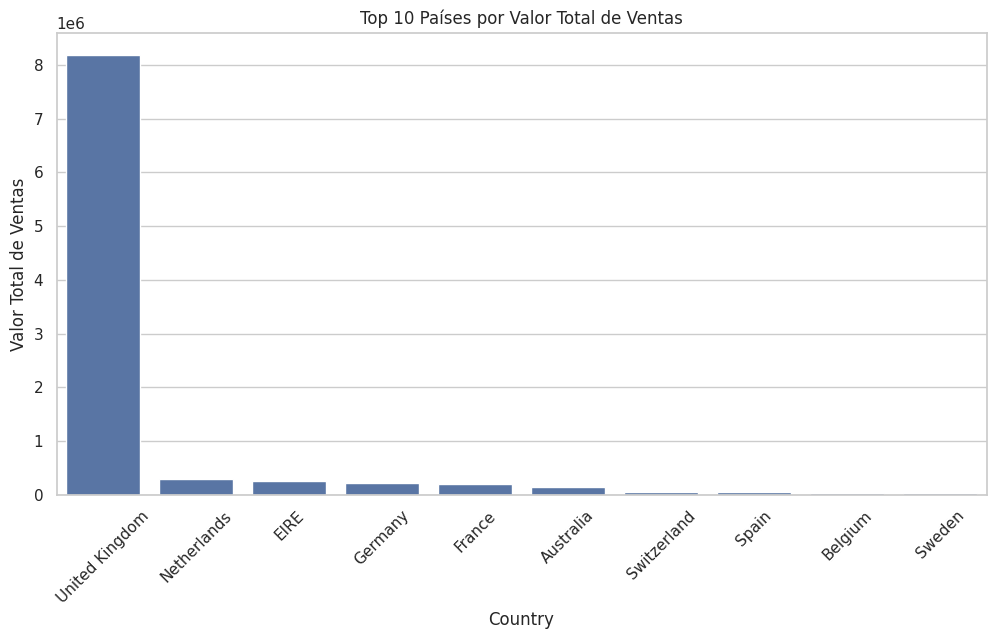

In [10]:
# Ventas por país
plt.figure(figsize=(12, 6))
country_counts = df['Country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Países por Número de Transacciones')
plt.xticks(rotation=45)
plt.ylabel('Número de Transacciones')
plt.show()

# Valor total de ventas por país
plt.figure(figsize=(12, 6))
df['TotalValue'] = df['Quantity'] * df['UnitPrice']
country_sales = df.groupby('Country')['TotalValue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title('Top 10 Países por Valor Total de Ventas')
plt.xticks(rotation=45)
plt.ylabel('Valor Total de Ventas')
plt.show()

# 3.3 Análisis temporal

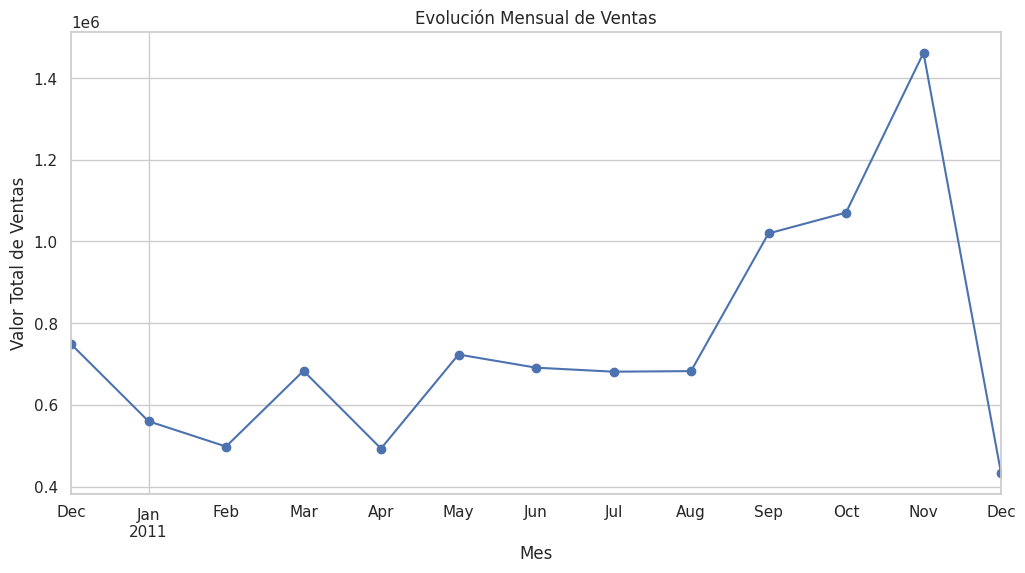

In [11]:
# Extraer mes y año de InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Ventas por mes
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('YearMonth')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Evolución Mensual de Ventas')
plt.ylabel('Valor Total de Ventas')
plt.xlabel('Mes')
plt.grid(True)
plt.show()

# 3.4 Análisis de productos

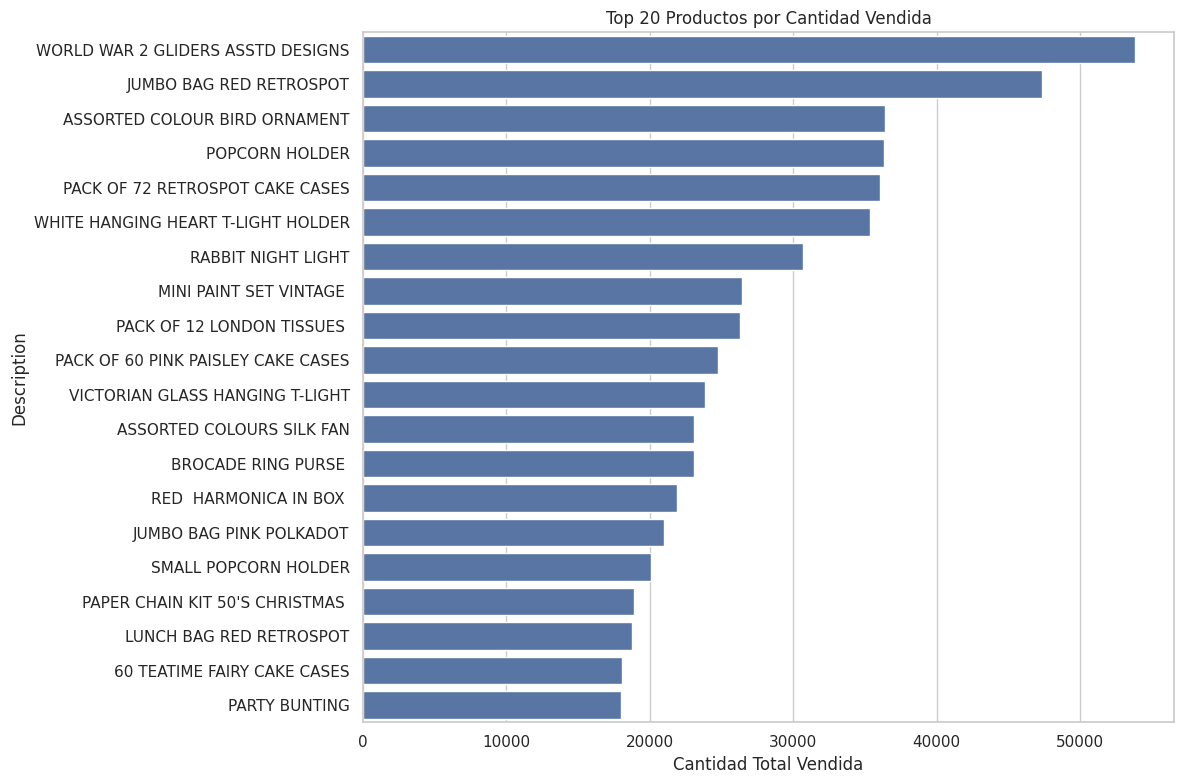

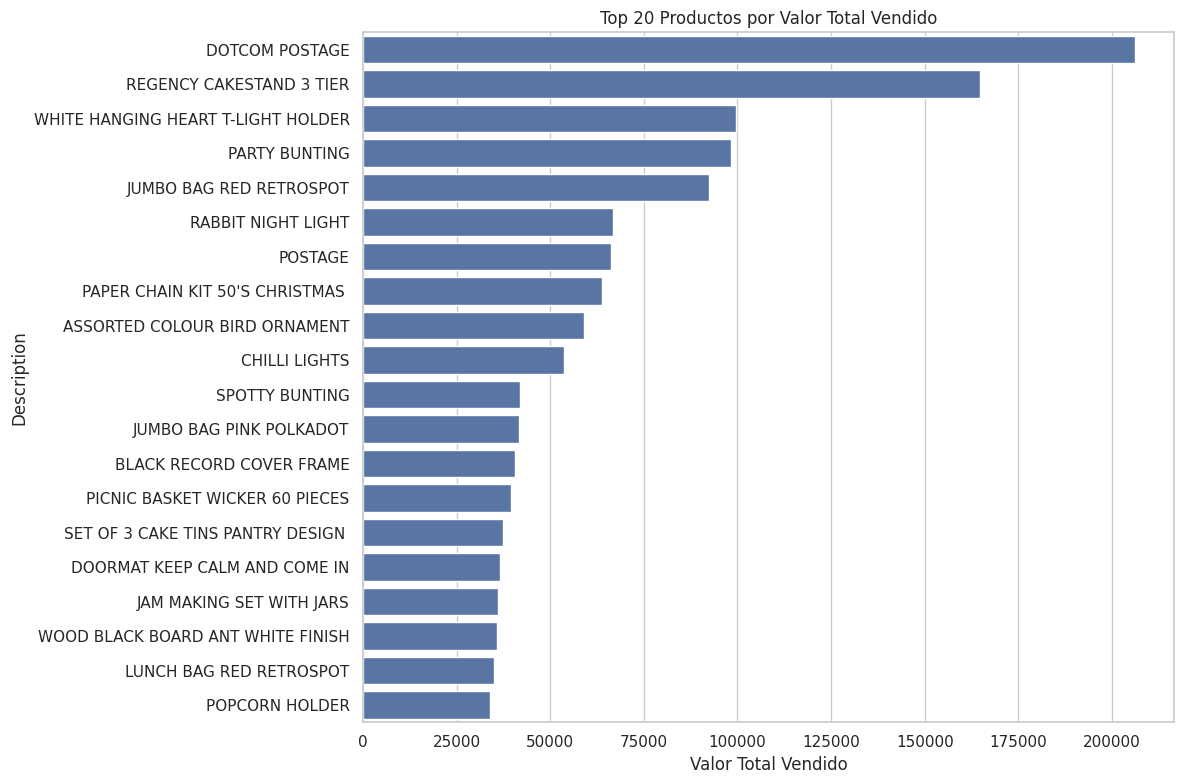

In [12]:
# Top 20 productos por cantidad vendida
plt.figure(figsize=(12, 8))
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)
sns.barplot(y=top_products_qty.index, x=top_products_qty.values)
plt.title('Top 20 Productos por Cantidad Vendida')
plt.xlabel('Cantidad Total Vendida')
plt.tight_layout()
plt.show()

# Top 20 productos por valor total vendido
plt.figure(figsize=(12, 8))
top_products_value = df.groupby('Description')['TotalValue'].sum().sort_values(ascending=False).head(20)
sns.barplot(y=top_products_value.index, x=top_products_value.values)
plt.title('Top 20 Productos por Valor Total Vendido')
plt.xlabel('Valor Total Vendido')
plt.tight_layout()
plt.show()

# 4. Análisis de valores atípicos


--- Análisis de Valores Atípicos (Outliers) ---

Variable: Quantity
  Límite inferior: -12.50
  Límite superior: 23.50
  Número de outliers: 58619 (10.82% del total)

Variable: UnitPrice
  Límite inferior: -3.07
  Límite superior: 8.45
  Número de outliers: 39627 (7.31% del total)

Variable: TotalValue
  Límite inferior: -17.60
  Límite superior: 38.40
  Número de outliers: 44997 (8.30% del total)


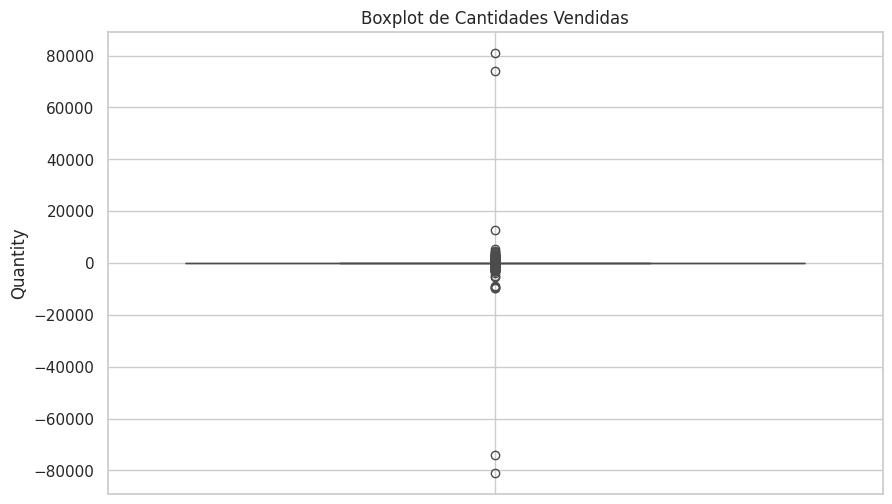

In [13]:
# Identificación de outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, len(outliers)

print("\n--- Análisis de Valores Atípicos (Outliers) ---")
outlier_vars = ['Quantity', 'UnitPrice', 'TotalValue']

for var in outlier_vars:
    outliers, lower, upper, count = identify_outliers(df, var)
    print(f"\nVariable: {var}")
    print(f"  Límite inferior: {lower:.2f}")
    print(f"  Límite superior: {upper:.2f}")
    print(f"  Número de outliers: {count} ({(count/len(df)*100):.2f}% del total)")

# Visualización de outliers en Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot de Cantidades Vendidas')
plt.grid(True)
plt.show()

# 5. Algebra lineal


--- Álgebra Lineal: Matriz de Correlación ---
            Quantity  UnitPrice  TotalValue
Quantity    1.000000  -0.001235    0.886681
UnitPrice  -0.001235   1.000000   -0.162029
TotalValue  0.886681  -0.162029    1.000000


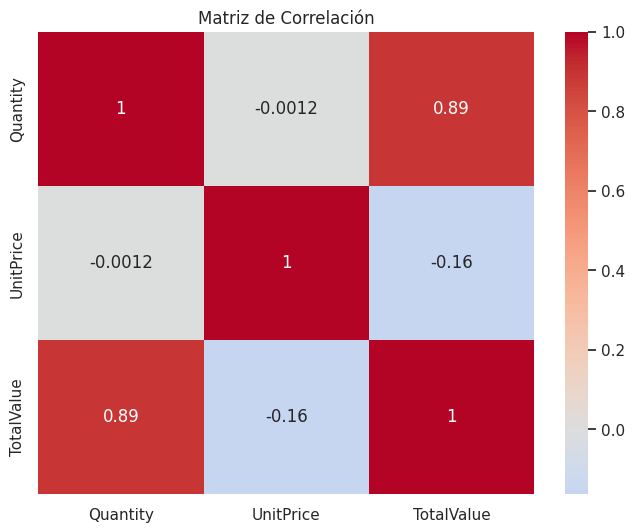

In [20]:
print("\n--- Álgebra Lineal: Matriz de Correlación ---")
corr_matrix = df[['Quantity', 'UnitPrice', 'TotalValue']].corr()
print(corr_matrix)

# Visualización
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# 6. Conclusiones y hallazgos principales

In [ ]:
print("\n=== CONCLUSIONES Y HALLAZGOS PRINCIPALES ===\n")

# 1. Resumen general
print("1. RESUMEN GENERAL:")
print(f"   - Número total de transacciones: {len(df)}")
print(f"   - Número de productos únicos: {df['Description'].nunique()}")
print(f"   - Número de países con ventas: {df['Country'].nunique()}")
print(f"   - Período cubierto: De {df['InvoiceDate'].min()} a {df['InvoiceDate'].max()}")

# 2. Patrones de ventas
print("\n2. PATRONES DE VENTAS:")
print(f"   - Cantidad promedio por transacción: {df['Quantity'].mean():.2f}")
print(f"   - Precio unitario promedio: {df['UnitPrice'].mean():.2f}")
print(f"   - Valor total de ventas: {df['TotalValue'].sum():.2f}")

# 3. Distribución geográfica
print("\n3. DISTRIBUCIÓN GEOGRÁFICA:")
top_country = df['Country'].value_counts().index[0]
top_country_pct = df['Country'].value_counts(normalize=True)[0]*100
print(f"   - País con más transacciones: {top_country} ({top_country_pct:.1f}% del total)")

# 4. Productos destacados
print("\n4. PRODUCTOS DESTACADOS:")
top_product_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).index[0]
top_product_value = df.groupby('Description')['TotalValue'].sum().sort_values(ascending=False).index[0]
print(f"   - Producto más vendido por cantidad: {top_product_qty}")
print(f"   - Producto con mayor valor total vendido: {top_product_value}")

# 5. Valores atípicos
print("\n5. VALORES ATÍPICOS:")
for var in outlier_vars:
    _, _, _, count = identify_outliers(df, var)
    print(f"   - {var}: {count} outliers ({count/len(df)*100:.1f}% de los registros)")

# 6. Recomendaciones
print("\n6. RECOMENDACIONES:")
print("   - Investigar los outliers en cantidades y precios para detectar posibles errores o transacciones especiales")
print("   - Analizar más a fondo los patrones de compra en el país principal")
print("   - Estudiar los productos más vendidos para optimizar el inventario")
print("   - Explorar oportunidades de crecimiento en otros países con menor participación")

Resumen metodológico
Este análisis exploratorio de datos siguió una metodología estructurada:

Exploración inicial: Identificación de tipos de variables, manejo de fechas y creación de variables derivadas.

Análisis estadístico descriptivo: Cálculo de medidas de tendencia central, dispersión y distribución para variables numéricas y categóricas.

Visualización de datos: Uso de histogramas, gráficos de barras, líneas y boxplots para identificar patrones y relaciones.

Análisis de valores atípicos: Identificación de outliers mediante el método IQR.

Conclusiones y recomendaciones: Síntesis de hallazgos principales y sugerencias para análisis posteriores.